In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('Deer_Density_DMA.csv')

In [3]:
df.head(25)

,DMA,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,101,8.0,7.0,7.0,6.0,7.0,8.0,9.0,8,8,7,7
1,104,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4,5,4,3
2,110,18.0,19.0,18.0,16.0,11.0,11.0,13.0,14,15,14,12
3,111,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3,2,3,3
4,117,7.0,8.0,7.0,7.0,7.0,7.0,7.0,8,8,7,7
5,118,7.0,6.0,6.0,6.0,5.0,5.0,6.0,5,4,4,3
6,119,8.0,9.0,8.0,8.0,6.0,6.0,7.0,6,5,4,3
7,126,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4,4,4,3
8,130,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4,4,4,3
9,131,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4,4,4,4


In [25]:

# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['DMA'], var_name='Year', value_name='Deer Density')

# Drop rows with None values in the Value column
df_melted = df_melted.dropna(subset=['Deer Density'])

# Calculate the warmth for each DMA
df_melted['Year'] = df_melted['Year'].astype(int)

def calculate_warmth(row):
    first_year = df_melted[df_melted['DMA'] == row['DMA']]['Year'].min()
    if first_year == 2010:
        return 9
    else:
        return min(row['Year'] - first_year + 1, 9)

df_melted['Warmth'] = df_melted.apply(calculate_warmth, axis=1)

# Calculate yearly average of all values present by year
yearly_avg = df_melted.groupby('Year')['Deer Density'].mean().reset_index()

# Calculate average for records starting in 2010
avg_2010 = df_melted[df_melted.groupby('DMA')['Year'].transform('min') == 2010].groupby('Year')['Deer Density'].mean().reset_index()

# Calculate average for records starting in 2012
avg_2012 = df_melted[df_melted.groupby('DMA')['Year'].transform('min') == 2012].groupby('Year')['Deer Density'].mean().reset_index()

# Calculate average for records starting in 2017
avg_2017 = df_melted[df_melted.groupby('DMA')['Year'].transform('min') == 2017].groupby('Year')['Deer Density'].mean().reset_index()




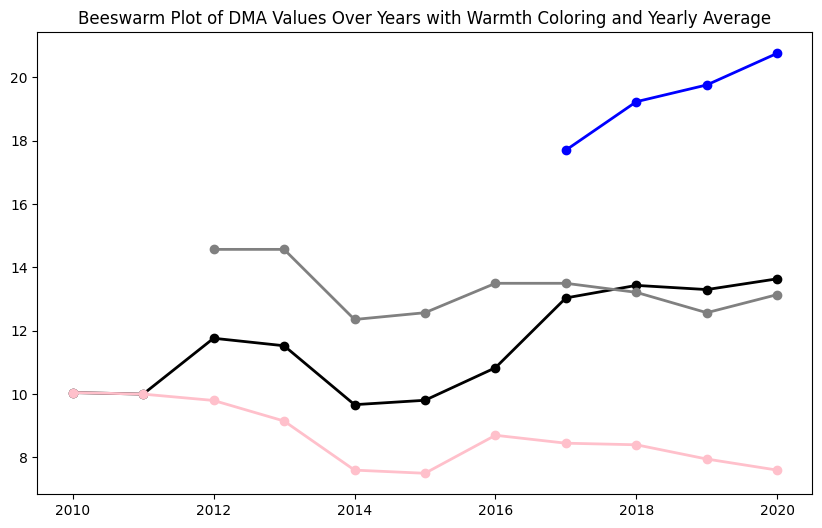

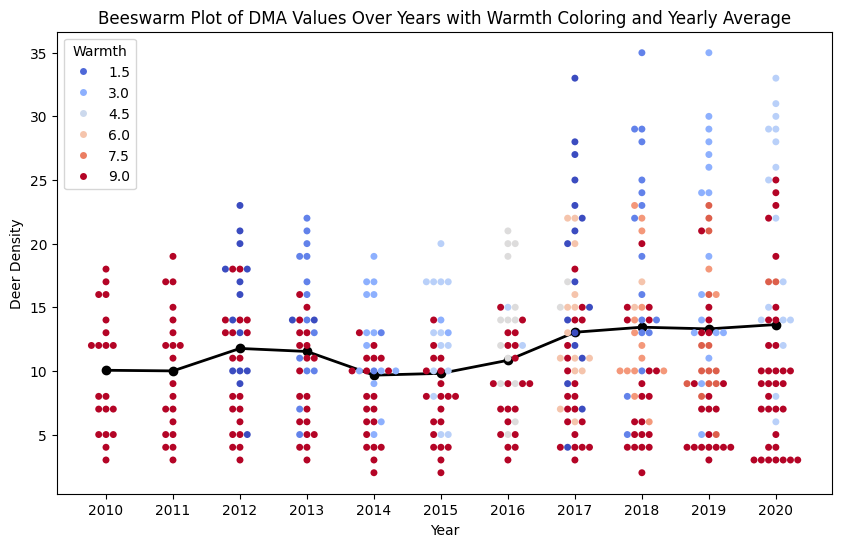

In [26]:
# Create a beeswarm plot with color based on warmth
plt.figure(figsize=(10,6))
# sns.swarmplot(x='Year', y='Deer Density', hue='Warmth', palette='coolwarm', data=df_melted)
plt.plot(yearly_avg['Year'], yearly_avg['Deer Density'], color='black', marker='o', linestyle='-', linewidth=2)
plt.plot(avg_2010['Year'], avg_2010['Deer Density'], color='pink', marker='o', linestyle='-', linewidth=2)
plt.plot(avg_2012['Year'], avg_2012['Deer Density'], color='grey', marker='o', linestyle='-', linewidth=2)
plt.plot(avg_2017['Year'], avg_2017['Deer Density'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Beeswarm Plot of DMA Values Over Years with Warmth Coloring and Yearly Average')
plt.show()

plt.figure(figsize=(10,6))
sns.swarmplot(x='Year', y='Deer Density', hue='Warmth', palette='coolwarm', data=df_melted)
plt.plot(yearly_avg['Deer Density'], color='black', marker='o', linestyle='-', linewidth=2)
# plt.plot(avg_2010['Year'], avg_2010['Deer Density'], color='pink', marker='o', linestyle='-', linewidth=2)
# plt.plot(avg_2012['Year'], avg_2012['Deer Density'], color='grey', marker='o', linestyle='-', linewidth=2)
# plt.plot(avg_2017['Year'], avg_2017['Deer Density'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Beeswarm Plot of DMA Values Over Years with Warmth Coloring and Yearly Average')
plt.show()
# # Create a beeswarm plot with color based on warmth
# plt.figure(figsize=(10,6))
# sns.swarmplot(x='Year', y='Deer Density', hue='Warmth', palette='coolwarm', data=df_melted)
# plt.plot(yearly_avg['Deer Density'], color='black', marker='o', linestyle='-', linewidth=2)
# plt.title('Beeswarm Plot of DMA Values Over Years with Warmth Coloring and Yearly Average')
# plt.show()


In [27]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 0 to 582
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DMA           430 non-null    int64  
 1   Year          430 non-null    int32  
 2   Deer Density  430 non-null    float64
 3   Warmth        430 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 15.1 KB


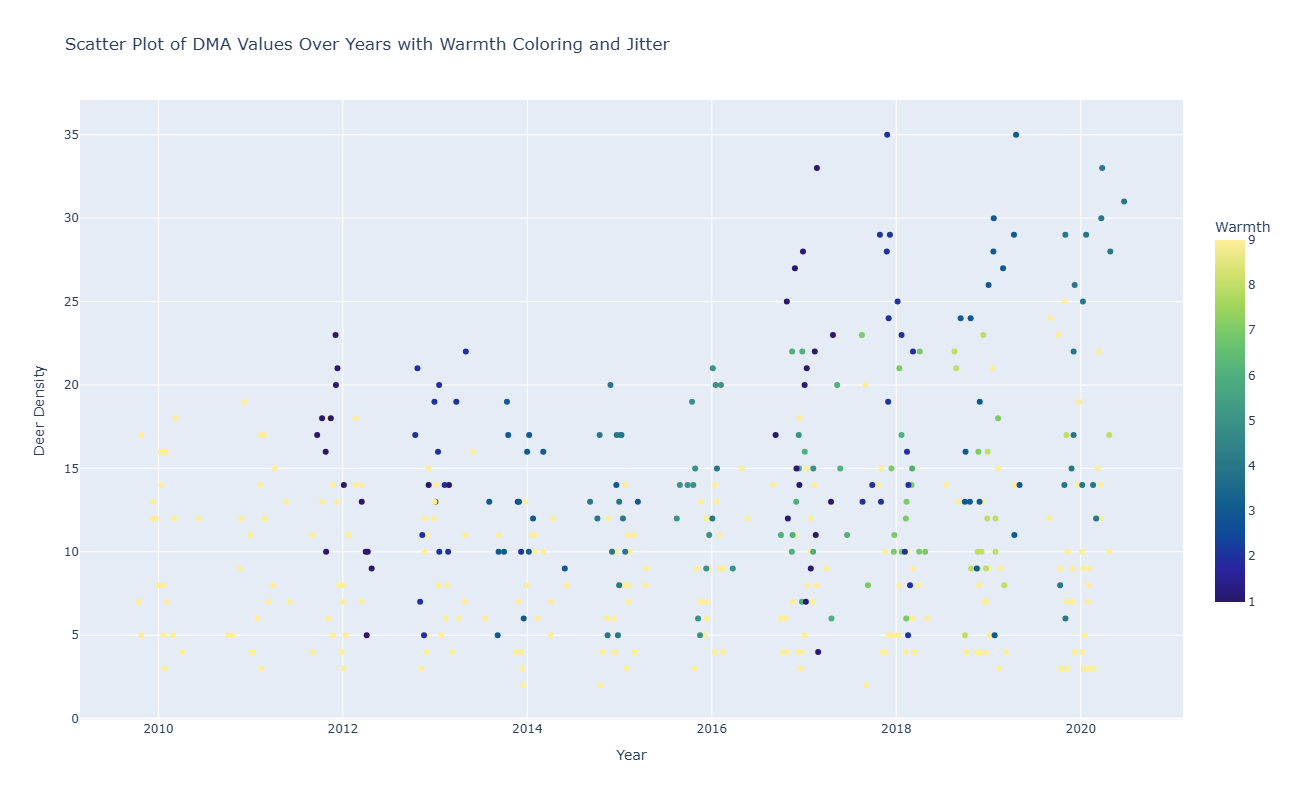

In [42]:
# Add jitter to the Year values
df_melted['Year'] += np.random.uniform(-0.1, 0.1, size=len(df_melted))

# Create a scatter plot with jitter and color based on warmth
fig = px.scatter(df_melted, x='Year', y='Deer Density', color='Warmth', color_continuous_scale='haline', title='Scatter Plot of DMA Values Over Years with Warmth Coloring and Jitter')

# # Add yearly average lines
# fig.add_trace(go.Scatter(x=yearly_avg['Year'], y=yearly_avg['Deer Density'], mode='lines+markers', name='Yearly Average', line=dict(color='black', width=2)))
# fig.add_trace(go.Scatter(x=avg_2010['Year'], y=avg_2010['Deer Density'], mode='lines+markers', name='Avg Starting 2010', line=dict(color='pink', width=2)))
# fig.add_trace(go.Scatter(x=avg_2012['Year'], y=avg_2012['Deer Density'], mode='lines+markers', name='Avg Starting 2012', line=dict(color='grey', width=2)))
# fig.add_trace(go.Scatter(x=avg_2017['Year'], y=avg_2017['Deer Density'], mode='lines+markers', name='Avg Starting 2017', line=dict(color='blue', width=2)))
fig.update_layout(height=800)

fig.update_layout(coloraxis_colorbar=dict(lenmode="fraction", len=0.65))

fig.show()


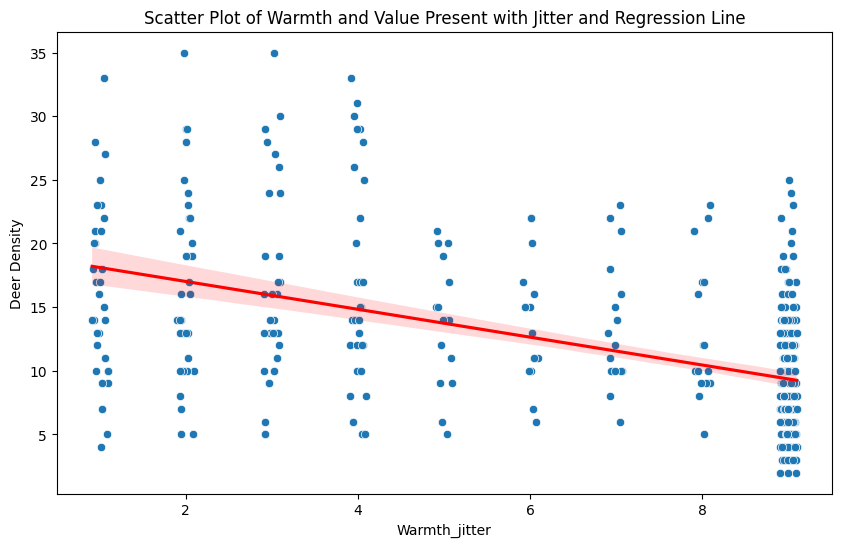

In [7]:
jitter_strength = 0.1
df_melted['Warmth_jitter'] = df_melted['Warmth'] + np.random.uniform(-jitter_strength,jitter_strength,len(df_melted))

# Create a scatter plot of warmth and value present with jitter and regression line
plt.figure(figsize=(10))
sns.scatterplot(x='Warmth_jitter', y='Deer Density', data=df_melted)
sns.regplot(x='Warmth_jitter', y='Deer Density', data=df_melted)
plt.title('Scatter Plot of Warmth and Value Present with Jitter and Regression Line')
plt.show()



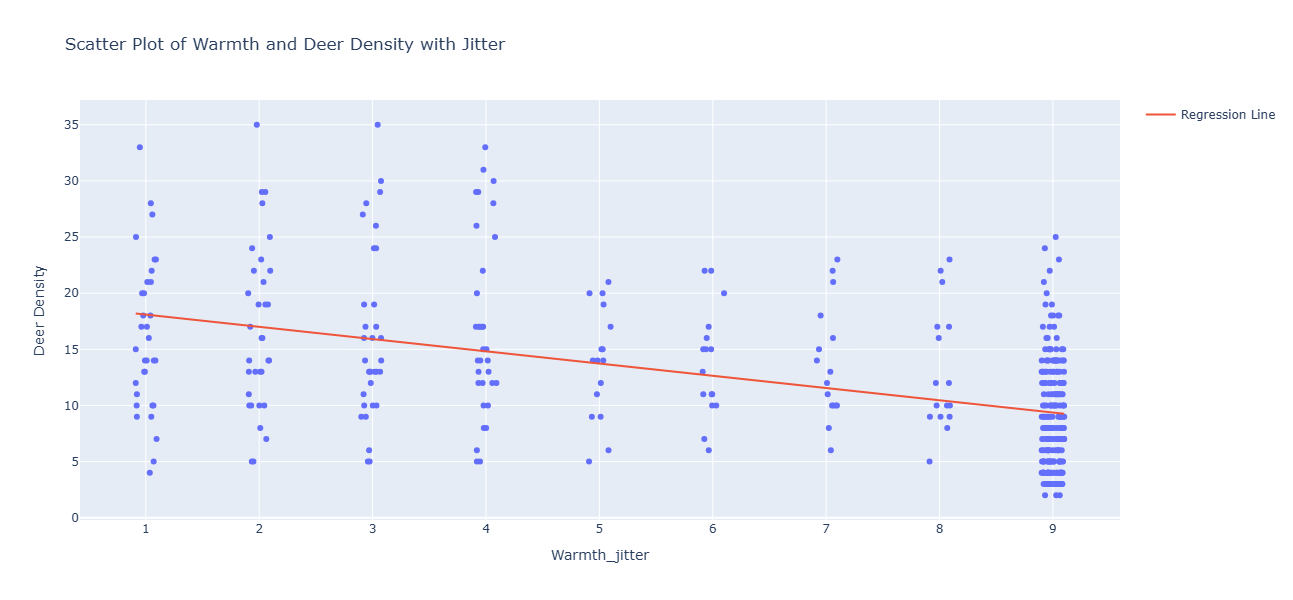

In [37]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Add jitter to the Warmth values
jitter_strength = 0.1
df_melted['Warmth_jitter'] = df_melted['Warmth'] + np.random.uniform(-jitter_strength, jitter_strength, len(df_melted))

# Create a scatter plot of warmth and deer density with jitter
fig = px.scatter(df_melted, x='Warmth_jitter', y='Deer Density', title='Scatter Plot of Warmth and Deer Density with Jitter')

# Add regression line
regression_line = np.polyval(np.polyfit(df_melted['Warmth_jitter'], df_melted['Deer Density'], 1), df_melted['Warmth_jitter'])
fig.add_trace(go.Scatter(x=df_melted['Warmth_jitter'], y=regression_line, mode='lines', name='Regression Line'))

fig.update_layout(height=600)

fig.show()


In [9]:
yearly_avg = df_melted.groupby('Year')['Deer Density'].mean().reset_index()

In [10]:
yearly_avg

,Year,Deer Density
0,2009.815585,7.0
1,2009.849044,7.0
2,2009.849236,8.0
3,2009.849692,12.0
4,2009.858389,5.0
...,...,...
425,2020.153089,14.0
426,2020.170220,17.0
427,2020.177635,19.0
428,2020.193590,7.0


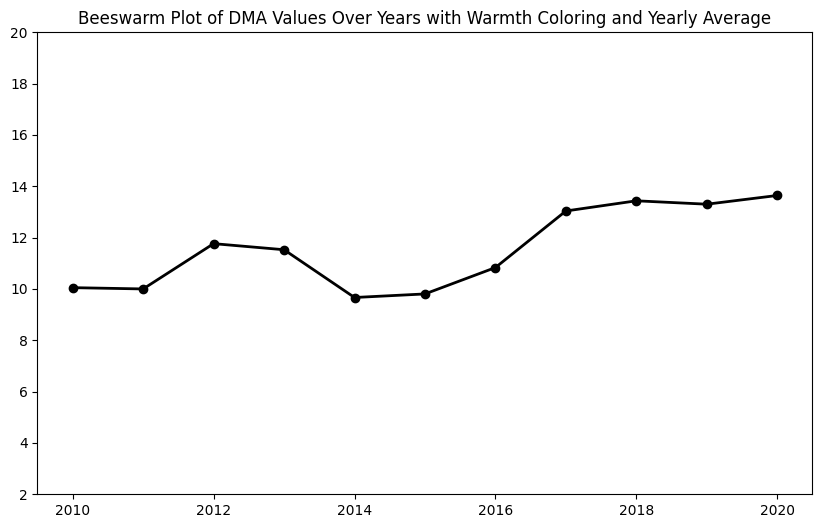

In [17]:
# Create a beeswarm plot with color based on warmth
plt.figure(figsize=(10,6))
# sns.swarmplot(x='Year', y='Deer Density', hue='Warmth', palette='coolwarm', data=df_melted)
plt.plot(yearly_avg['Year'], yearly_avg['Deer Density'], color='black', marker='o', linestyle='-', linewidth=2)
plt.title('Beeswarm Plot of DMA Values Over Years with Warmth Coloring and Yearly Average')
plt.ylim(2, 20)
plt.show()
